In [1]:
%matplotlib notebook 

import numpy
import matplotlib.pyplot as plot

In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)

In [3]:
numpy.random.seed(1234)

In [4]:
# data set generation
n_dim = 2
n_mean = numpy.array([0., -1.])
n_cov = numpy.diag([0.2, .5])
p_mean = numpy.array([1., 1.])
p_cov = numpy.diag([.5, .3])

# generate postive examples
n_pos = 50
pos_y = numpy.ones(n_pos) 
pos_x = numpy.random.randn(n_pos, n_dim) * numpy.diag(p_cov)[None, :] + p_mean[None,:]
# generate negative examples
n_neg = 50
neg_y = numpy.zeros(n_neg)
neg_x = numpy.random.randn(n_neg, n_dim) * numpy.diag(n_cov)[None, :] + n_mean[None,:]
# combine them
y = numpy.concatenate([pos_y, neg_y])
x = numpy.concatenate([pos_x, neg_x], axis=0)
# shuffle them
si = numpy.random.permutation(n_pos + n_neg)
y = y[si]
x = x[si]

# grab training examples
n_tra = numpy.round(0.5 * (n_pos + n_neg)).astype(numpy.int)

y_tra = y[:n_tra]
x_tra = x[:n_tra]

y_tes = y[n_tra:]
x_tes = x[n_tra:]

In [5]:
def sigmoid(a):
    return 1. / (1. + numpy.exp(-a))

In [6]:
def logreg(x, w, pre=False):
    x = x.reshape([1, -1]) if len(x.shape) < 2 else x
    
    y = numpy.sum(x * w[None,:-1], axis=1) + w[-1]
    if pre:
        return y    
    return sigmoid(y)

In [7]:
def logreg_dist(y, x, w, avg=False):
    y_ = logreg(x, w)
    
    d = -(y * numpy.log(y_) + (1. - y) * numpy.log(1-y_))
    
    if not avg:
        return d
    return numpy.mean(d)

In [8]:
def logreg_rule(y, x, w):
    y_ = logreg(x, w)
    dw = numpy.zeros(w.shape)
    dw[:-1] = numpy.mean((y_ - y_tra)[:, None] * x, axis=0)
    dw[-1] = numpy.mean(y_ - y_tra)
    return dw

In [9]:
w0 = numpy.random.randn(n_dim+1); w0[-1] = 0.
w = numpy.copy(w0)

n_iter = 1000
eta = 1.
old_cost = numpy.Inf
for ni in xrange(n_iter):
    pred_y = logreg(x_tra, w)
    w -= eta * logreg_rule(y_tra, x_tra, w)
    cost = logreg_dist(y_tra, x_tra, w, avg=True)
    if numpy.mod(ni, 50) == 0:
        print 'Logistic regression cost {} after iteration {}'.format(cost, ni)
    if cost < 1e-16 or cost / old_cost >= 1.:
        print 'Converged'
        break
    old_cost = cost

Logistic regression cost 0.40432794924 after iteration 0
Logistic regression cost 0.0437769559037 after iteration 50
Logistic regression cost 0.0269120259521 after iteration 100
Logistic regression cost 0.019985489058 after iteration 150
Logistic regression cost 0.0160946627738 after iteration 200
Logistic regression cost 0.0135677834875 after iteration 250
Logistic regression cost 0.0117804336825 after iteration 300
Logistic regression cost 0.0104424725258 after iteration 350
Logistic regression cost 0.00939952175401 after iteration 400
Logistic regression cost 0.00856140461461 after iteration 450
Logistic regression cost 0.00787170701625 after iteration 500
Logistic regression cost 0.00729322693917 after iteration 550
Logistic regression cost 0.0068003833904 after iteration 600
Logistic regression cost 0.00637497657759 after iteration 650
Logistic regression cost 0.00600368629783 after iteration 700
Logistic regression cost 0.00567652773584 after iteration 750
Logistic regression cos

In [10]:
# visualize data 
def vis_data(x, y = None, c='r'):
    if y is None: 
        y = [None] * len(x)
    plot.hold('on')
    for x_, y_ in zip(x, y):
        if y_ is None:
            plot.plot(x_[0], x_[1], 'o', markerfacecolor='none', markeredgecolor=c)
        else:
            plot.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
    plot.hold('off')
    plot.grid('on')

In [11]:
def vis_hyperplane(w, typ='k--'):
    plot.hold('on')

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    m0, m1 = lim0[0], lim0[1]

    intercept0 = -(w[0] * m0 + w[-1])/w[1]
    intercept1 = -(w[0] * m1 + w[-1])/w[1]
    
    plt1, = plot.plot([m0, m1], [intercept0, intercept1], typ)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    plot.hold('off')
    
    return plt1

<IPython.core.display.Javascript object>


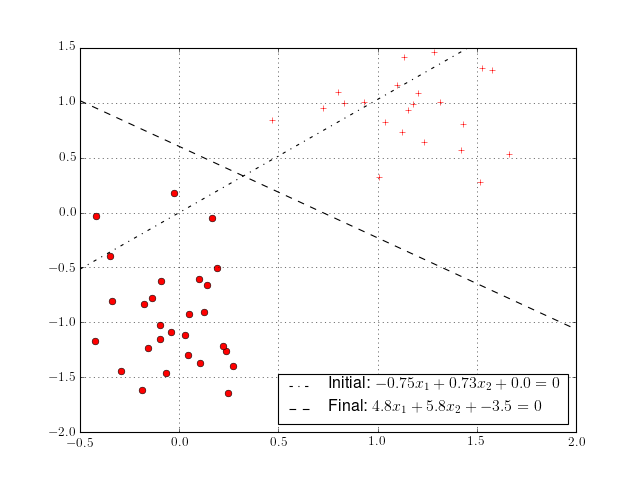

In [12]:
plot.figure()

vis_data(x_tra, y_tra, c='r')
#vis_data(x_tes, y_tes, c='b')

plt0 = vis_hyperplane(w0, 'k-.')
plt1 = vis_hyperplane(w, 'k--')
plot.legend([plt0, plt1], [
        'Initial: ${:.2} x_1 + {:.2} x_2 + {:.2} = 0$'.format(*list(w0)),
        'Final: ${:.2} x_1 + {:.2} x_2 + {:.2} = 0$'.format(*list(w))],
           loc='best')

plot.show()

In [13]:
tra_er = numpy.sum(numpy.abs(numpy.round(logreg(x_tra, w)) - y_tra)) / numpy.float(len(y_tra))
tes_er = numpy.sum(numpy.abs(numpy.round(logreg(x_tes, w)) - y_tes)) / numpy.float(len(y_tes))

print 'Training error rate {}, Test error rate {}'.format(tra_er, tes_er)

Training error rate 0.0, Test error rate 0.0
